In [2]:
import pandas as pd
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context # Para que la URL del archivo cvs funcione en mac
ruta = "https://raw.githubusercontent.com/lbtriana/Proyecto_Bicicletas/main/SeoulBikeData_utf8.csv" #ruta desde url
df = pd.read_csv(ruta)
df['fecha'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['day'] = df['fecha'].dt.day
df['month'] = df['fecha'].dt.month
df['year'] = df['fecha'].dt.year
df['day_of_week'] = df['fecha'].dt.dayofweek
df['functioning_day'] = df['Functioning Day'].replace({'Yes': 1, 'No': 0})
df['is_holiday'] = df['Holiday'].replace({'Holiday': 1, 'No Holiday': 0})
pd.set_option('future.no_silent_downcasting', True) # Esta linea es para evitar un warning de perder demasiada info al hacer downcasting
df['Hour_PM'] = np.where(df['Hour'] >= 12, 1, 0) #1 si es hora en la tarde 
df['Hour_lab'] = np.where((df['Hour'] >= 8) & (df['Hour'] <= 17), 1, 0) #1 si es horario laboral

df.info()

var_continuas = [
    'Hour', 
    'Temperature(C)', 
    'Humidity(%)', 
    'Wind speed (m/s)', 
    'Visibility (10m)', 
    'Dew point temperature(C)', 
    'Solar Radiation (MJ/m2)', 
    'Rainfall(mm)', 
    'Snowfall (cm)', 
    'day', 
    'month', 
    'year', 
    'day_of_week',
    'fecha',
    'Rented Bike Count'

 ]

var_categoricas = [
    'Seasons', 
    'Hour_PM', 
    'Hour_lab',
    'functioning_day', 
    'is_holiday' 
]

continuas=df[var_continuas]
categoricas=df[var_categoricas]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   object        
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

C:\Users\User\AppData\Local\Temp\ipykernel_11948\889776224.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['functioning_day'] = df['Functioning Day'].replace({'Yes': 1, 'No': 0})
C:\Users\User\AppData\Local\Temp\ipykernel_11948\889776224.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_holiday'] = df['Holiday'].replace({'Holiday': 1, 'No Holiday': 0})


In [3]:
df_cat = pd.get_dummies(categoricas, dtype="int64", drop_first=True)

df_cat.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Hour_PM          8760 non-null   int64
 1   Hour_lab         8760 non-null   int64
 2   functioning_day  8760 non-null   int64
 3   is_holiday       8760 non-null   int64
 4   Seasons_Spring   8760 non-null   int64
 5   Seasons_Summer   8760 non-null   int64
 6   Seasons_Winter   8760 non-null   int64
dtypes: int64(7)
memory usage: 479.2 KB


In [4]:

df = pd.concat([continuas, df_cat], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Hour                      8760 non-null   int64         
 1   Temperature(C)            8760 non-null   float64       
 2   Humidity(%)               8760 non-null   int64         
 3   Wind speed (m/s)          8760 non-null   float64       
 4   Visibility (10m)          8760 non-null   int64         
 5   Dew point temperature(C)  8760 non-null   float64       
 6   Solar Radiation (MJ/m2)   8760 non-null   float64       
 7   Rainfall(mm)              8760 non-null   float64       
 8   Snowfall (cm)             8760 non-null   float64       
 9   day                       8760 non-null   int32         
 10  month                     8760 non-null   int32         
 11  year                      8760 non-null   int32         
 12  day_of_week         

In [59]:
features = [
    'Hour', 
    'Temperature(C)', 
    'Humidity(%)', 
    'Wind speed (m/s)', 
    'Visibility (10m)',     
    'Rainfall(mm)', 
    'Snowfall (cm)', 
    'Seasons_Winter',
    'Seasons_Spring',
    'Seasons_Summer',
    'month', 
    'day_of_week', 
    'is_holiday', 
    'Hour_PM'
]

X = df[features]

Y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, Y_train)



LinearRegression()

In [7]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)


562.2293304484076
[ 3.29464425e+01  2.10178410e+01 -6.91130611e+00 -2.19536585e+00
  1.89656021e-02 -5.66063283e+01  2.52295811e+01 -2.91085950e+02
 -3.58690562e+01  6.22544554e+00  4.69676459e+00 -1.06471628e+01
 -1.51900500e+02 -6.55512341e+01]


In [8]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))


[('Hour', np.float64(32.9464424834087)),
 ('Temperature(C)', np.float64(21.01784104249738)),
 ('Humidity(%)', np.float64(-6.911306111674041)),
 ('Wind speed (m/s)', np.float64(-2.195365852618799)),
 ('Visibility (10m)', np.float64(0.018965602135557768)),
 ('Rainfall(mm)', np.float64(-56.606328255832146)),
 ('Snowfall (cm)', np.float64(25.229581059450872)),
 ('Seasons_Winter', np.float64(-291.0859503739787)),
 ('Seasons_Spring', np.float64(-35.86905617500156)),
 ('Seasons_Summer', np.float64(6.22544554284226)),
 ('month', np.float64(4.696764592638605)),
 ('day_of_week', np.float64(-10.647162784003225)),
 ('is_holiday', np.float64(-151.90049982837192)),
 ('Hour_PM', np.float64(-65.55123412916379))]

In [9]:
y_pred = linreg.predict(X_test)

In [10]:
from sklearn import metrics

In [11]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(Y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(Y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [12]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  339.9441633142128
MSE:  216314.6333402288
RMSE:  465.0963699495286


In [13]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, Y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[202153.40942684 184554.22782909 453463.04101694 434579.24669683
 272605.69756722]


In [14]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[449.61473444 429.59775119 673.39664464 659.22624849 522.11655554]


In [15]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

546.7903868607889


In [64]:
features = [
    'Hour', 
    'Temperature(C)', 
    'Humidity(%)', 
    'Wind speed (m/s)', 
    'Visibility (10m)',     
    'Rainfall(mm)', 
    'Snowfall (cm)', 
    'Seasons_Winter',
    'Seasons_Spring',
    'Seasons_Summer',
    'month', 
    'day_of_week', 
    'is_holiday']

X = df[features]

Y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, Y_train)

import statsmodels.api as sm

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(Y_train, X_train).fit()

# resumen de resultados
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     475.9
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:05:02   Log-Likelihood:                -49654.
No. Observations:                6570   AIC:                         9.934e+04
Df Residuals:                    6556   BIC:                         9.943e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              572.9952     49.863  

Revisión de Correlación para analizar multicolinealidad

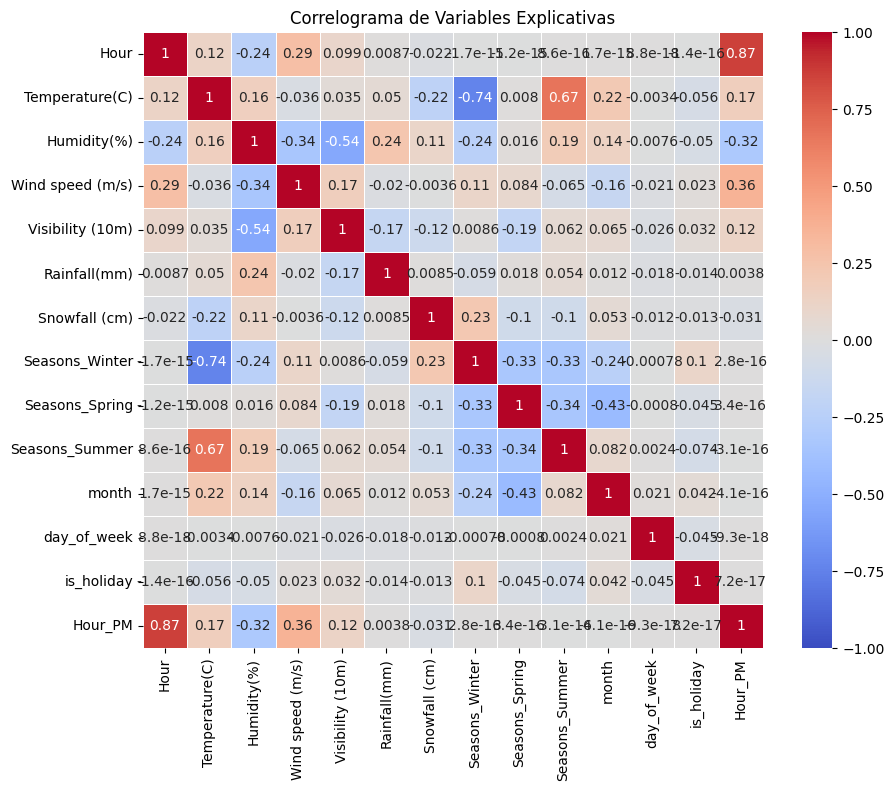

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
variables = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
             'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Winter', 'Seasons_Spring', 'Seasons_Summer', 
             'month', 'day_of_week', 'is_holiday']

# Crear la matriz de correlación
correlation_matrix = df[variables].corr()

# Crear el correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlograma de Variables Explicativas')
plt.show()

In [65]:
import statsmodels.api as sm

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(Y_train, X_train).fit()

# resumen de resultados
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     475.9
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:05:21   Log-Likelihood:                -49654.
No. Observations:                6570   AIC:                         9.934e+04
Df Residuals:                    6556   BIC:                         9.943e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              572.9952     49.863  

In [66]:
#Cálculo del VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set 
X = sm.add_constant(X)
pd.Series([variance_inflation_factor(X, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const               76.060283
Hour                 1.183316
Temperature(C)       4.320727
Humidity(%)          1.924882
Wind speed (m/s)     1.224572
Visibility (10m)     1.607279
Rainfall(mm)         1.070608
Snowfall (cm)        1.112547
Seasons_Winter       3.868756
Seasons_Spring       2.636726
Seasons_Summer       2.777344
month                1.831916
day_of_week          1.005865
is_holiday           1.028608
dtype: float64

No hay ningún valor superior a 5

In [67]:
from statsmodels. stats. stattools import durbin_watson
# 1. Calcular los residuos
residuals = model.resid

# 2. Calcular el estadístico de Durbin-Watson
durbin_watson_statistic = sm.stats.durbin_watson(residuals)
print("El estadistico de prueba es:", durbin_watson_statistic)

El estadistico de prueba es: 2.0491893462146815


No parece haber problema de autocorrelación. Tener en cuenta de JB que el p valor lleva a rechazar la hipótesis nula, lo que indica que los residuos no siguen una distribución normal, y puede afectar la validez de las pruebas estadísticas y los intervalos de confianza. 

Repetición sin var no significativas

In [68]:
features = [
    'Hour', 
    'Temperature(C)', 
    'Humidity(%)', 
    #'Wind speed (m/s)', 
    #'Visibility (10m)',     
    'Rainfall(mm)', 
    'Snowfall (cm)', 
    'Seasons_Winter',
    #'Seasons_Spring',
    #'Seasons_Summer',
    'month', 
    'day_of_week', 
    'is_holiday']

X = df[features]

Y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, Y_train)

import statsmodels.api as sm

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(Y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     685.3
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:08:17   Log-Likelihood:                -49660.
No. Observations:                6570   AIC:                         9.934e+04
Df Residuals:                    6560   BIC:                         9.941e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            568.4119     29.548     19.

Repetición de modelo  sin  estaciones

In [20]:
features = [
    'Hour', 
    'Temperature(C)', 
    'Humidity(%)', 
    'Wind speed (m/s)', 
    'Visibility (10m)',     
    'Rainfall(mm)', 
    'Snowfall (cm)', 
    'month', 
    'day_of_week', 
    'is_holiday', 
    'Hour_PM'
]

X = df[features]

Y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, Y_train)

LinearRegression()

In [21]:
import statsmodels.api as sm

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(Y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     536.2
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        09:47:31   Log-Likelihood:                -49730.
No. Observations:                6570   AIC:                         9.948e+04
Df Residuals:                    6558   BIC:                         9.957e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              316.8644     40.175  

Debido al alto valor de condition number, se repite la revisión de Correlación para analizar multicolinealidad

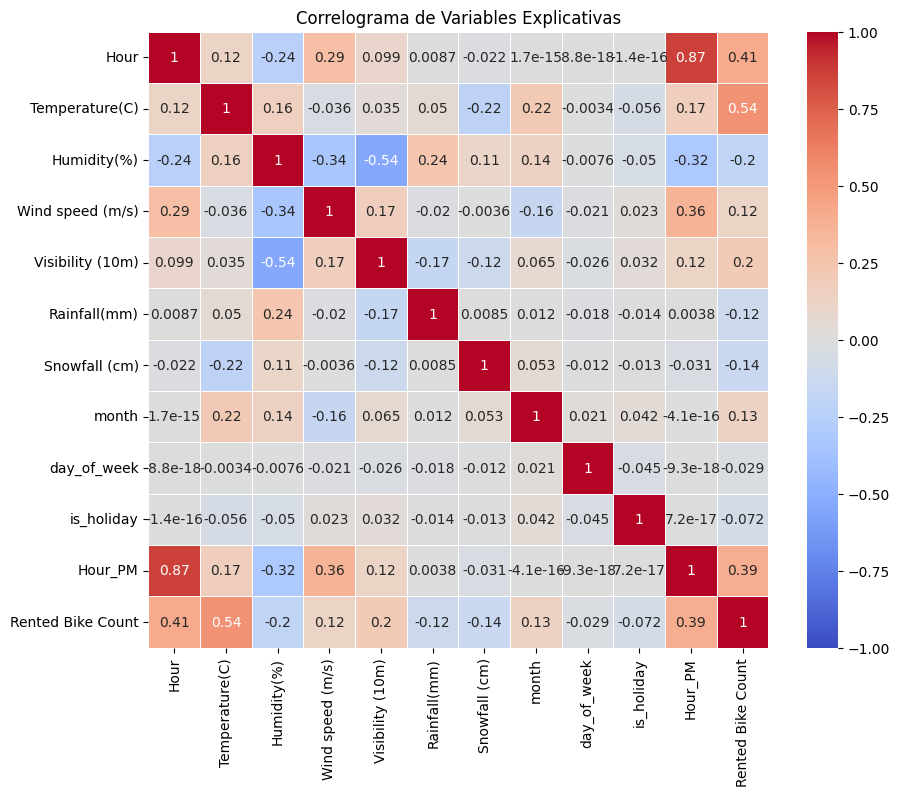

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
variables = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
             'Rainfall(mm)', 'Snowfall (cm)',
             'month', 'day_of_week', 'is_holiday', 'Hour_PM', 'Rented Bike Count']

# Crear la matriz de correlación
correlation_matrix = df[variables].corr()

# Crear el correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlograma de Variables Explicativas')
plt.show()

Repetición de modelo  sin  visibilidad  hour_pm ni humedad

In [56]:
features = [
    'Hour', 
    'Temperature(C)', 
    #'Humidity(%)', 
    'Wind speed (m/s)',    
    'Rainfall(mm)', 
    'Snowfall (cm)', 
    'month', 
    'day_of_week', 
    'is_holiday'
]

X = df[features]

Y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, Y_train)

Y_pred = linreg.predict(X_test)

In [57]:
import statsmodels.api as sm

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(Y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     644.9
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:28:43   Log-Likelihood:                -49932.
No. Observations:                6570   AIC:                         9.988e+04
Df Residuals:                    6561   BIC:                         9.994e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -33.3457     20.935  

C:\Users\User\AppData\Local\Temp\ipykernel_11948\2900040211.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red')


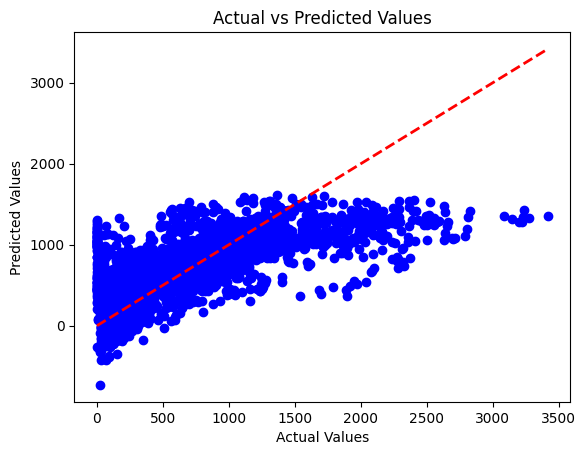

In [58]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

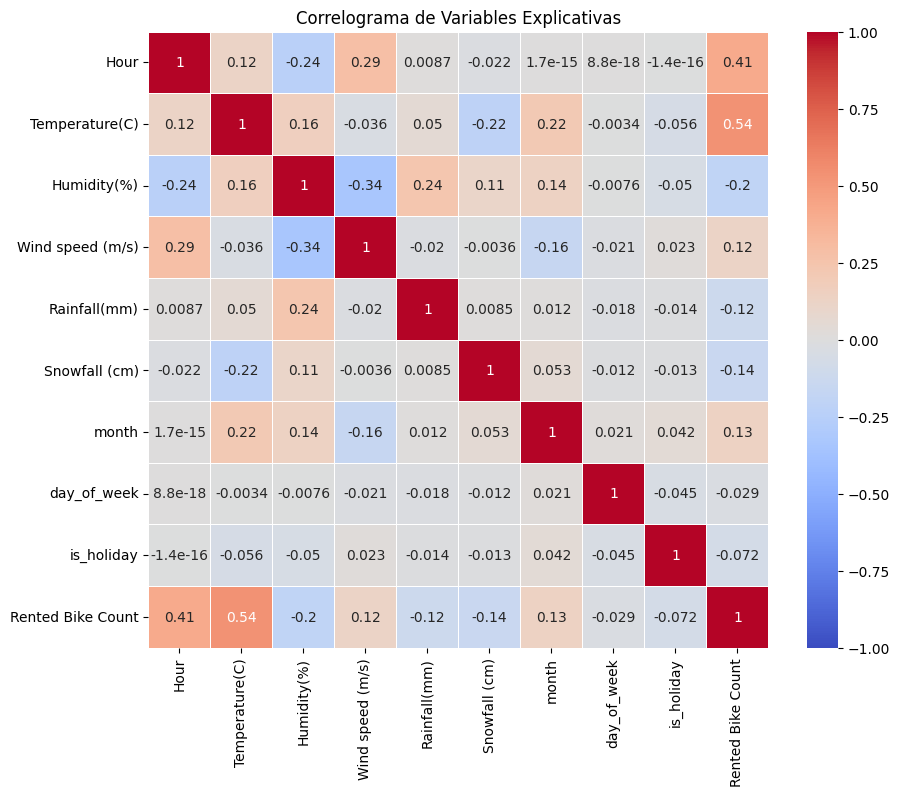

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
variables = ['Hour', 'Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)' ,
             'Rainfall(mm)', 'Snowfall (cm)',
             'month', 'day_of_week', 'is_holiday', 'Rented Bike Count']

# Crear la matriz de correlación
correlation_matrix = df[variables].corr()

# Crear el correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlograma de Variables Explicativas')
plt.show()

Modelo con estaciones y sin  temp

In [52]:
features = [
    'Hour', 
    'Wind speed (m/s)',  
    'Rainfall(mm)', 
    'Snowfall (cm)', 
    'Seasons_Winter',
    'Seasons_Spring',
    'Seasons_Summer',
    'month', 
    'day_of_week', 
    'is_holiday', 
]

X = df[features]

Y = df['Rented Bike Count']

from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, Y_train)

Y_pred = linreg.predict(X_test)

In [53]:
import statsmodels.api as sm

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(Y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     458.2
Date:                Tue, 10 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:21:00   Log-Likelihood:                -50097.
No. Observations:                6570   AIC:                         1.002e+05
Df Residuals:                    6559   BIC:                         1.003e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              360.4617     30.607  

C:\Users\User\AppData\Local\Temp\ipykernel_11948\2900040211.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red')


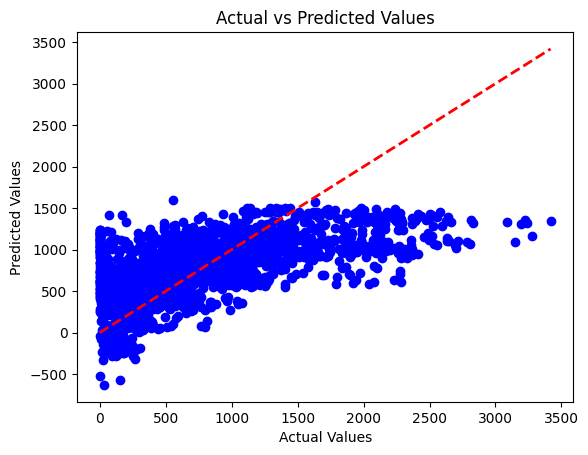

In [54]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

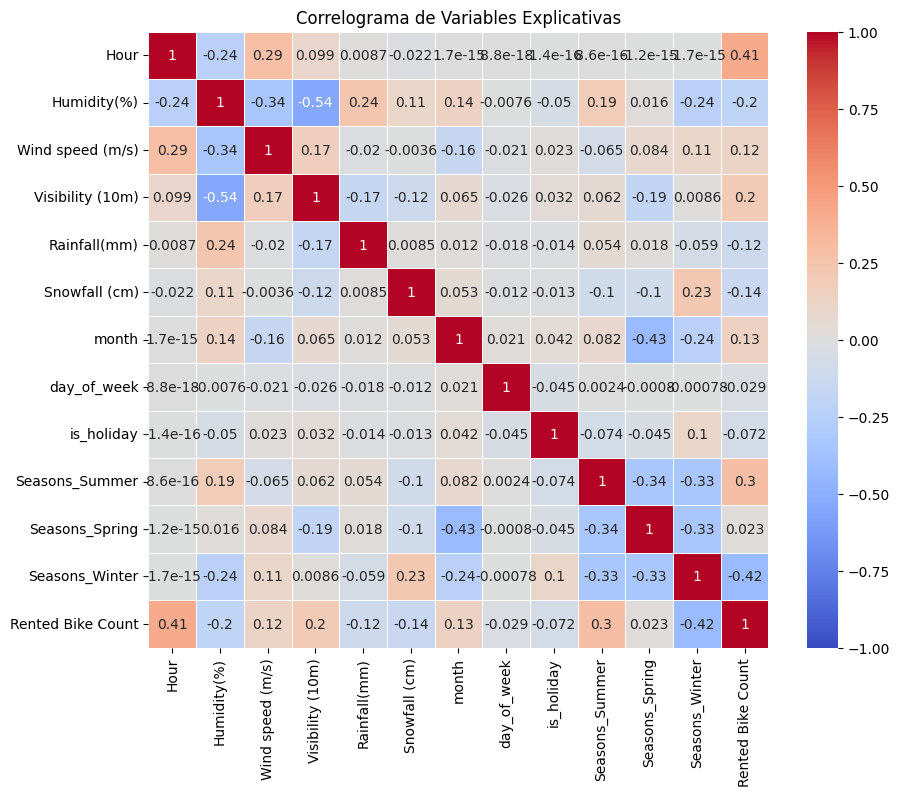

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
variables = ['Hour', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 
             'Rainfall(mm)', 'Snowfall (cm)',
             'month', 'day_of_week', 'is_holiday', 'Seasons_Summer','Seasons_Spring','Seasons_Winter', 'Rented Bike Count']

# Crear la matriz de correlación
correlation_matrix = df[variables].corr()

# Crear el correlograma
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlograma de Variables Explicativas')
plt.show()